In [1]:
import numpy as np
import pandas as pd

In [2]:
# nrowread = 10000
dataset = pd.read_csv(r"C:\Users\abhit\OneDrive\Desktop\New folder\Amazon_Unlocked_Mobile.csv",nrows=10000)

In [3]:
dataset.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
dataset.shape

(10000, 6)

In [5]:
dataset.describe(include="all")

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
count,10000,7473,9307.000000,10000.000000,9999,9676.000000
unique,125,34,NaN,NaN,6168,NaN
top,Apple iPhone 4 32GB (Black) - AT&T,Apple,NaN,NaN,good,NaN
freq,1007,5256,NaN,NaN,71,NaN
mean,NaN,NaN,119.196892,3.645800,NaN,1.691711
std,NaN,NaN,81.674116,1.622777,NaN,9.848566
min,NaN,NaN,17.950000,1.000000,NaN,0.000000
25%,NaN,NaN,53.000000,2.000000,NaN,0.000000
50%,NaN,NaN,100.000000,4.000000,NaN,0.000000
75%,NaN,NaN,161.060000,5.000000,NaN,1.000000


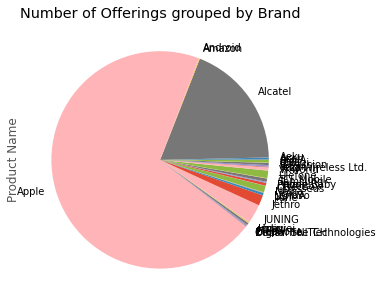

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
# Brand distribution
ax = dataset.groupby("Brand Name").count()["Product Name"].plot(kind="pie",figsize=(8, 5),title="Number of Offerings grouped by Brand")
plt.show()

In [7]:
dataset['Rating'].value_counts()

5    4994
1    2117
4    1381
3     831
2     677
Name: Rating, dtype: int64

In [8]:
df=pd.concat([dataset['Reviews'],dataset['Rating']], axis=1)
df.head()

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  9999 non-null   object
 1   Rating   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [11]:
df.dropna(inplace=True)

In [12]:
df=df.reset_index()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    9999 non-null   int64 
 1   Reviews  9999 non-null   object
 2   Rating   9999 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [14]:
df

,index,Reviews,Rating
0,0,I feel so LUCKY to have found this used (phone...,5
1,1,"nice phone, nice up grade from my pantach revu...",4
2,2,Very pleased,5
3,3,It works good but it goes slow sometimes but i...,4
4,4,Great phone to replace my lost phone. The only...,4
...,...,...,...
9994,9995,Words can't describe how unsatisfied I am. The...,1
9995,9996,First of all the Iphone receive was in great c...,2
9996,9997,Should of been black color but only had white ...,4
9997,9998,The phone was NOT unlocked when I received it....,1


In [15]:
df.drop(columns=['index'],inplace=True)

In [16]:
df

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4
...,...,...
9994,Words can't describe how unsatisfied I am. The...,1
9995,First of all the Iphone receive was in great c...,2
9996,Should of been black color but only had white ...,4
9997,The phone was NOT unlocked when I received it....,1


In [17]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}
df['sentiment']=df['Rating'].map(sentiment)

In [18]:
df['sentiment'].value_counts()

1    6374
0    3625
Name: sentiment, dtype: int64

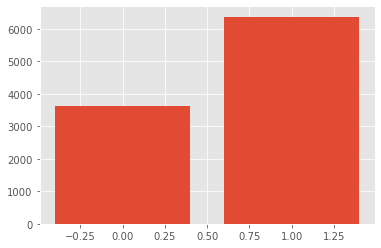

In [19]:
counts=df['sentiment'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [20]:
words = pd.Series(' '.join(df['Reviews']).split())

In [26]:
# #conda install -c conda-forge wordcloud
# conda install -c conda-forge/label/gcc7 wordcloud
# conda install -c conda-forge/label/cf201901 wordcloud
# conda install -c conda-forge/label/cf202003 wordcloud

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

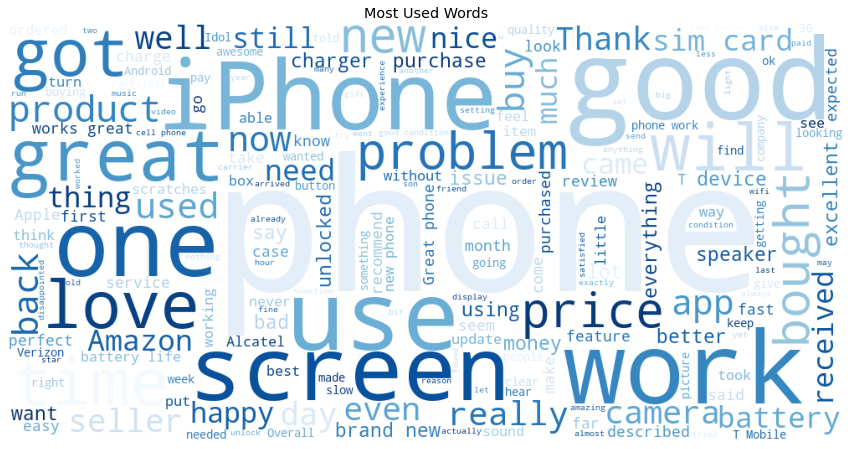

In [22]:
wordcloud = WordCloud(width = 1000, height = 500,max_words = 200,colormap="Blues",background_color="white").generate(' '.join(words))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Used Words")
plt.axis("off")
plt.show()

In [23]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
# all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
print(df.columns.tolist())

['Reviews', 'Rating', 'sentiment']


In [25]:
corpus=[]

for i in range(0, 9999):
  review = re.sub(r"[^a-zA-Z0-9]+"," ",df['Reviews'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [26]:
corpus

['feel lucki found use phone us use hard phone line someon upgrad sold one son like old one final fell apart 2 5 year want upgrad thank seller realli appreci honesti said use phone recommend seller highli would',
 'nice phone nice grade pantach revu clean set easi set never android phone fantast say least perfect size surf social media great phone samsung',
 'pleas',
 'work good goe slow sometim good phone love',
 'great phone replac lost phone thing volum button work still go set adjust job elig upgrad phone thaank',
 'alreadi phone problem know state use dang state charg wish would read comment would purchas item crack side damag good tri charg anoth way work request money back get money back sign unhappi custom',
 'charg port loos got solder need new batteri well 100 later includ cost purchas usabl phone phone sold state',
 'phone look good stay charg buy new batteri still stay charg long trash money lost never buy person',
 'origin use samsung s2 galaxi sprint want return back sams

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1400)

In [28]:
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [29]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = r"C:\Users\abhit\OneDrive\Desktop\New folder\Bow_File.pkl"
pickle.dump(cv, open(bow_path, "wb"))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [32]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, r"C:\Users\abhit\OneDrive\Desktop\New folder\Classifier_File") 

['C:\\Users\\abhit\\OneDrive\\Desktop\\New folder\\Classifier_File']

In [33]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 515  208]
 [ 190 1087]]


0.801

In [34]:
dataset1 = pd.read_csv(r"C:\Users\abhit\OneDrive\Desktop\Amazon_Reviews.csv", delimiter = '\t', quoting = 3)
dataset1.head()

,""" Review"""
0,"""This was utterly confusing at first, which ca..."
1,Terrible phone holder.
2,The cutouts and buttons are placed perfectly.
3,I love being able to use one headset for both ...
4,Problem is that the ear loops are made of weak...


In [35]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0    " Review"  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [36]:
print(dataset1.columns.tolist())

[' " Review"']


In [37]:
dataset1.dropna(inplace=True)

In [38]:
dataset1=dataset1.reset_index()

In [39]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1    " Review"  100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [40]:
dataset1.drop(columns=['index'],inplace=True)

In [41]:
dataset1

,""" Review"""
0,"""This was utterly confusing at first, which ca..."
1,Terrible phone holder.
2,The cutouts and buttons are placed perfectly.
3,I love being able to use one headset for both ...
4,Problem is that the ear loops are made of weak...
...,...
95,The screen does get smudged easily because it ...
96,What a piece of junk.. I lose more calls on th...
97,Item Does Not Match Picture.
98,The only thing that disappoint me is the infra...


In [42]:
corpus1=[]

for i in range(0, 100):
  review = re.sub(r"[^a-zA-Z0-9]+"," ",dataset1[' " Review"'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus1.append(review)

In [43]:
X_fresh = cv.transform(corpus1).toarray()
X_fresh.shape

(100, 1400)

In [44]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1]


In [45]:
dataset1['predicted_label'] = y_pred.tolist()
dataset1

,""" Review""",predicted_label
0,"""This was utterly confusing at first, which ca...",0
1,Terrible phone holder.,0
2,The cutouts and buttons are placed perfectly.,1
3,I love being able to use one headset for both ...,1
4,Problem is that the ear loops are made of weak...,0
...,...,...
95,The screen does get smudged easily because it ...,1
96,What a piece of junk.. I lose more calls on th...,0
97,Item Does Not Match Picture.,0
98,The only thing that disappoint me is the infra...,0


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

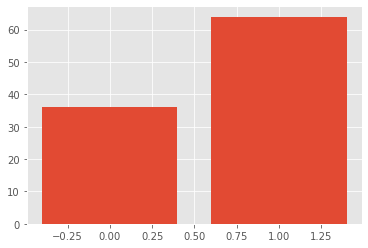

In [47]:
counts=dataset1['predicted_label'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [48]:
words1 = pd.Series(' '.join(dataset1[' " Review"']).split())

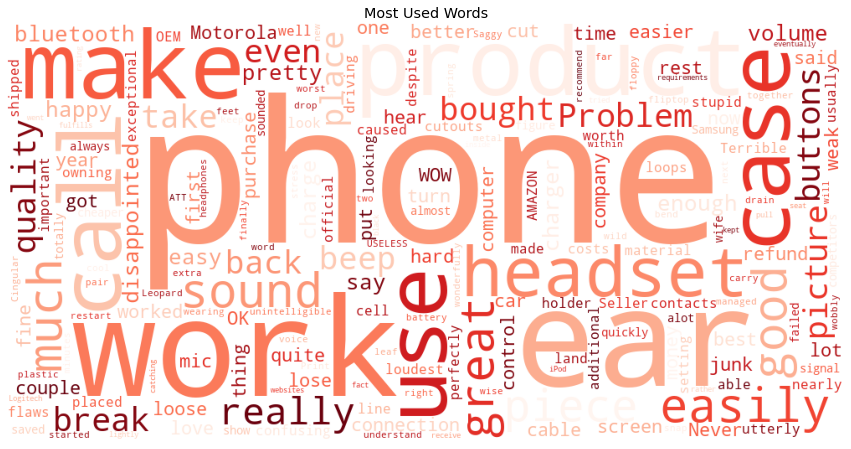

In [49]:
wordcloud = WordCloud(width = 1000, height = 500,max_words = 200,colormap="Reds",background_color="white").generate(' '.join(words1))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Most Used Words")
plt.axis("off")
plt.show()

In [50]:
dataset1.to_csv( r"C:\Users\abhit\OneDrive\Desktop\New folder\Prediction.csv")